# Z02FH Aging Quick Look 

## Load Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

## Understand My Directory Structure

In [8]:
files = [f for f in os.listdir('./Data/')]
for f in files:
    print(f)

Z02FH_cycle_life_230308.xlsx


## Load in 4.40V Charge Voltage Data

I decided to filter out rows with NAs just to keep the graphics more consistent.

Text(0, 0.5, 'Normalized Capacity (unitless)')

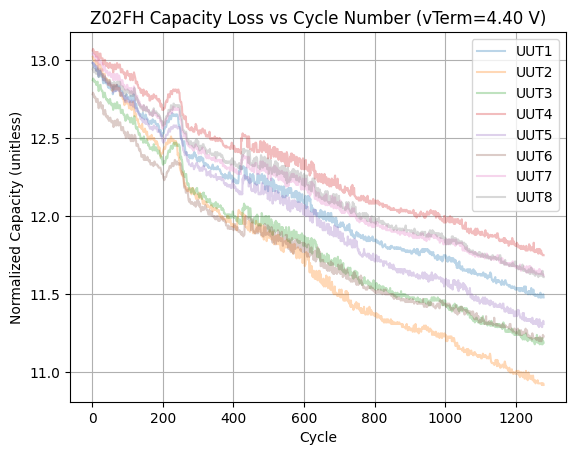

In [9]:
df4_40=pd.read_excel("./Data/Z02FH_cycle_life_230308.xlsx", 
                     sheet_name=1, 
                     skiprows=3, 
                     header=None,
                     usecols=list(range(9)),
                     names=['Cycle','UUT1','UUT2','UUT3','UUT4','UUT5','UUT6','UUT7','UUT8'],
                     index_col=0)
df4_40=df4_40.dropna(axis=0)
df4_40.plot(use_index=True, alpha=0.3, grid=True)
plt.title("Z02FH Capacity Loss vs Cycle Number (vTerm=4.40 V)")
plt.xlabel("Cycle")
plt.ylabel("Normalized Capacity (unitless)")

## Load in 4.35V Charge Voltage Data

Text(0, 0.5, 'Capacity (mAh)')

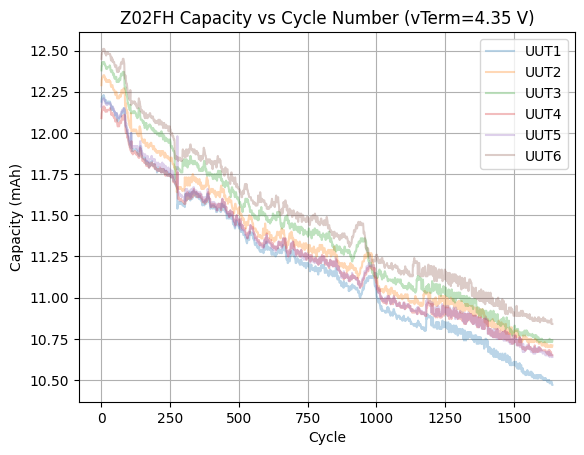

In [10]:
df4_35=pd.read_excel("./Data/Z02FH_cycle_life_230308.xlsx", 
                     sheet_name=0, 
                     skiprows=4, 
                     header=None,
                     nrows=1714,
                     usecols=list(range(7)),
                     names=['Cycle','UUT1','UUT2','UUT3','UUT4','UUT5','UUT6'],
                     index_col=0)
df4_35=df4_35.dropna(axis=0)
df4_35.plot(use_index=True, alpha=0.3, grid=True)
plt.title("Z02FH Capacity vs Cycle Number (vTerm=4.35 V)")
plt.xlabel("Cycle")
plt.ylabel("Capacity (mAh)")

## Charge Comparison

In [11]:
# Just examine the first rows of each dataframe
Q40=df4_40.iloc[0].mean()
Q35=df4_35.iloc[0].mean()
print(f'Mean charge at 4.40V termination voltage is {Q40:.2f} mAh.')
print(f'Mean charge at 4.35V termination voltage is {Q35:.2f} mAh.')
print(f'The percentage change in charge from 4.35V to 4.45V is {(Q40-Q35)/Q35:.2%}.')

Mean charge at 4.40V termination voltage is 12.96 mAh.
Mean charge at 4.35V termination voltage is 12.26 mAh.
The percentage change in charge from 4.35V to 4.45V is 5.70%.


## Plot the 4.35V Normalized Data and Extrapolate Curve

The cycles to get the mean to 0.8 is 2508.


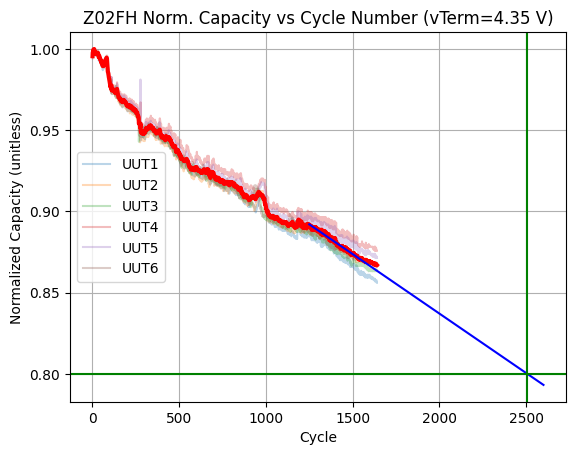

In [12]:
df4_35n=df4_35.apply(lambda x: x/x.max(), axis=0)
X= np.array(range(1250,1501)).reshape(-1,1)
y= df4_35n.mean(axis=1,skipna=True).loc[1250:1500]
reg35 = LinearRegression().fit(X, y)
xfit = np.array([1250,2600]).reshape(-1,1)
yfit = reg35.predict(xfit)

N=((0.8-reg35.intercept_)/reg35.coef_)[0]
print(f'The cycles to get the mean to 0.8 is {N:4.0f}.')

df4_35n.plot(use_index=True, alpha=0.3)
df4_35n.mean(axis=1,skipna=True).plot(use_index=True,color='red',lw=3)
plt.plot(xfit,yfit,color='blue')
plt.grid()
plt.title("Z02FH Norm. Capacity vs Cycle Number (vTerm=4.35 V)")
plt.xlabel("Cycle")
plt.ylabel("Normalized Capacity (unitless)")
plt.axhline(y = 0.8, color = 'g', linestyle = '-')
plt.axvline(x = N, color = 'g')

## Plot the 4.40V Data and Extrapolate Curve

The cycles to get the mean to 0.8 is 2355.


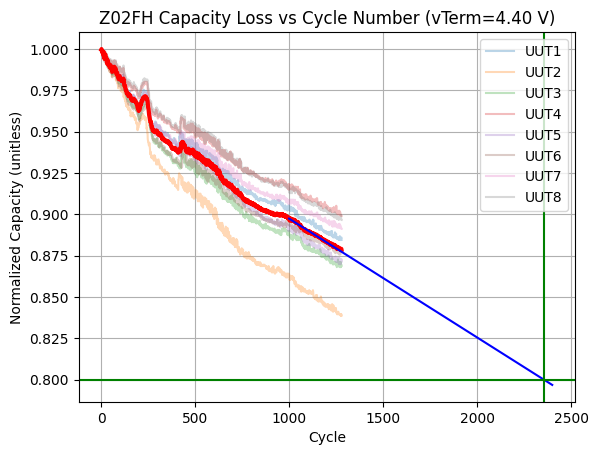

In [13]:
df4_40n=df4_40.apply(lambda x: x/x.max(), axis=0)
X= np.array(range(1000,1201)).reshape(-1,1)
y= df4_40n.mean(axis=1,skipna=True).loc[1000:1200]
reg40 = LinearRegression().fit(X, y)
xfit = np.array([1000,2400]).reshape(-1,1)
yfit = reg40.predict(xfit)

N=((0.8-reg40.intercept_)/reg40.coef_)[0]
print(f'The cycles to get the mean to 0.8 is {N:4.0f}.')

df4_40n.plot(use_index=True, alpha=0.3)
df4_40n.mean(axis=1,skipna=True).plot(use_index=True,color='red',lw=3, grid=True)
plt.plot(xfit,yfit,color='blue')
plt.title("Z02FH Capacity Loss vs Cycle Number (vTerm=4.40 V)")
plt.xlabel("Cycle")
plt.ylabel("Normalized Capacity (unitless)")
plt.axhline(y = 0.8, color = 'g', linestyle = '-')
plt.axvline(x = N, color = 'g')